# Exploratory Data Analysis

In this section, we will perform data profiling on the training dataset - `customer.csv`.
The objective of this section is to understand the data that will be used to train the model, making use of statistics and visualizations, in order to identify potential issues that need to be addressed in the data preprocessing section.

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('../data/customer.csv')
rows,features = df.shape
print(f"Data set has {rows} rows with {features} features\n")
print(f"Features:")
list(df.columns)

Data set has 72458 rows with 15 features

Features:


['Unnamed: 0',
 'custid',
 'sex',
 'is_employed',
 'income',
 'marital_status',
 'health_ins',
 'housing_type',
 'num_vehicles',
 'age',
 'state_of_res',
 'code_column',
 'gas_usage',
 'rooms',
 'recent_move_b']

Before exploring the statistical properties of the dataset, let's first look at the columns and their meanings, in the context of our problem.

The columns are:
- _unnamed_: an index column
- **custid**: the unique ID of the customer
- **sex**: the gender of the customer
- **is_employed**: indicates whether the customer is employed or not
- **income**: numerical value representing the customer's income
- **marital_status**: the marital status of the customer
- **health_ins**: indicates whether the customer has health insurance or not. This can be the target variable in the context of a classification problem.
- **housing_type**: describes the situation of the customer's habitation
- **num_vehicles**: the number of vehicles the customer owns
- **age**: the age of the customer in years
- **state_of_res**: the US state where the customer resides
- **code_column**: likely a categorical or code-based feature (potentially related to location or demographics).
- **gas_usage**: a measure of the customer's gas usage
- **rooms**: the number of rooms in the customer's house
- **recent_move_b**: indicator if the customer has recently moved

In [17]:
print(df.isnull().sum())
t_sum = df.isnull().sum().sum()
percentual = t_sum/(len(df)*len(df.columns))*100
print(f'\nTotal NaN values {t_sum}')
print(f'{percentual}% of missing values')
print(f'Total Duplicated rows {df.duplicated().sum()}')

Unnamed: 0            0
custid                0
sex                   0
is_employed       25515
income                0
marital_status        0
health_ins            0
housing_type       1686
num_vehicles       1686
age                   0
state_of_res          0
code_column           0
gas_usage          1686
rooms                 0
recent_move_b      1687
dtype: int64

Total NaN values 32260
2.968156265238713% of missing values
Total Duplicated rows 0


As we can see the DataSet have 32260 missing values ​​this corresponds to approximately 2.97% of the values, most of them in is_emplyed.
There are no duplicated rows.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72458 entries, 0 to 72457
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      72458 non-null  int64  
 1   custid          72458 non-null  object 
 2   sex             72458 non-null  object 
 3   is_employed     46943 non-null  object 
 4   income          72458 non-null  float64
 5   marital_status  72458 non-null  object 
 6   health_ins      72458 non-null  bool   
 7   housing_type    70772 non-null  object 
 8   num_vehicles    70772 non-null  float64
 9   age             72458 non-null  int64  
 10  state_of_res    72458 non-null  object 
 11  code_column     72458 non-null  int64  
 12  gas_usage       70772 non-null  float64
 13  rooms           72458 non-null  int64  
 14  recent_move_b   70771 non-null  object 
dtypes: bool(1), float64(3), int64(4), object(7)
memory usage: 7.8+ MB


now let's analyze each feature, as custid and unnamed have no duplicate or missing values, and both correspond to the row and id respectively, we will not analyze them because they are useless for the evaluation.

## Sex

sex
Female            37461
Male              34997
Missing values        0
Name: count, dtype: int64


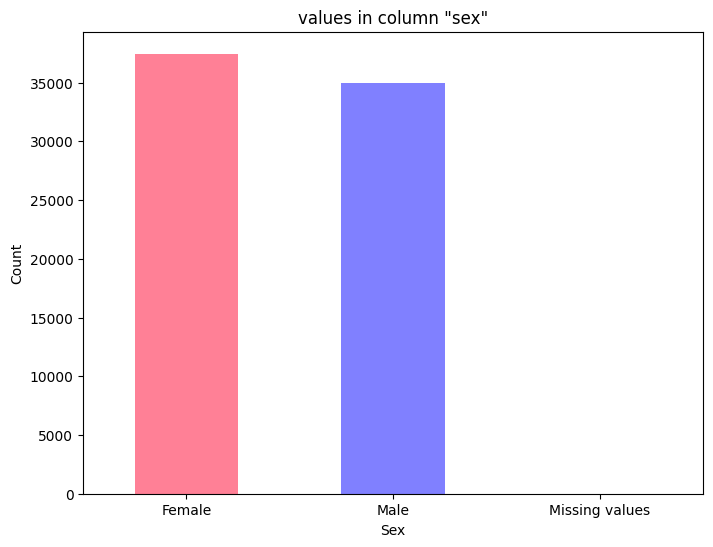

In [19]:
sex_counts = df['sex'].value_counts()
sex_counts['Missing values'] = df['sex'].isnull().sum()
print(sex_counts)
plt.figure(figsize=(8, 6)) 
sex_counts.plot(kind='bar',color=['#FF8096','#8080FF'])
plt.title('values in column "sex"')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

The data is balanced and there are no missing values.

## is_imployed

is_employed
True              44630
False              2313
Missing values    25515
Name: count, dtype: int64


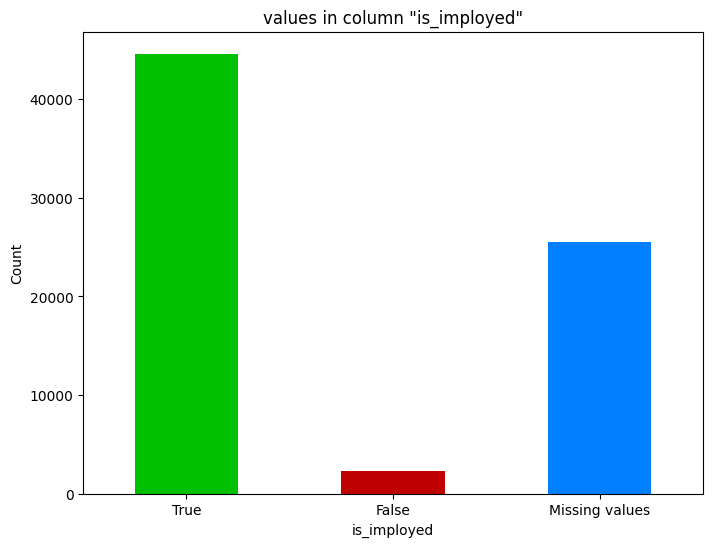

In [20]:
is_imployed_counts = df['is_employed'].value_counts()
is_imployed_counts['Missing values'] = df['is_employed'].isnull().sum()
print(is_imployed_counts)
plt.figure(figsize=(8, 6)) 
is_imployed_counts.plot(kind='bar',color=['#00C000','#BF0000','#0080FF'])
plt.title('values in column "is_imployed"')
plt.xlabel('is_imployed')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

The data is not balanced and there are 25515 missing values, which is not good.

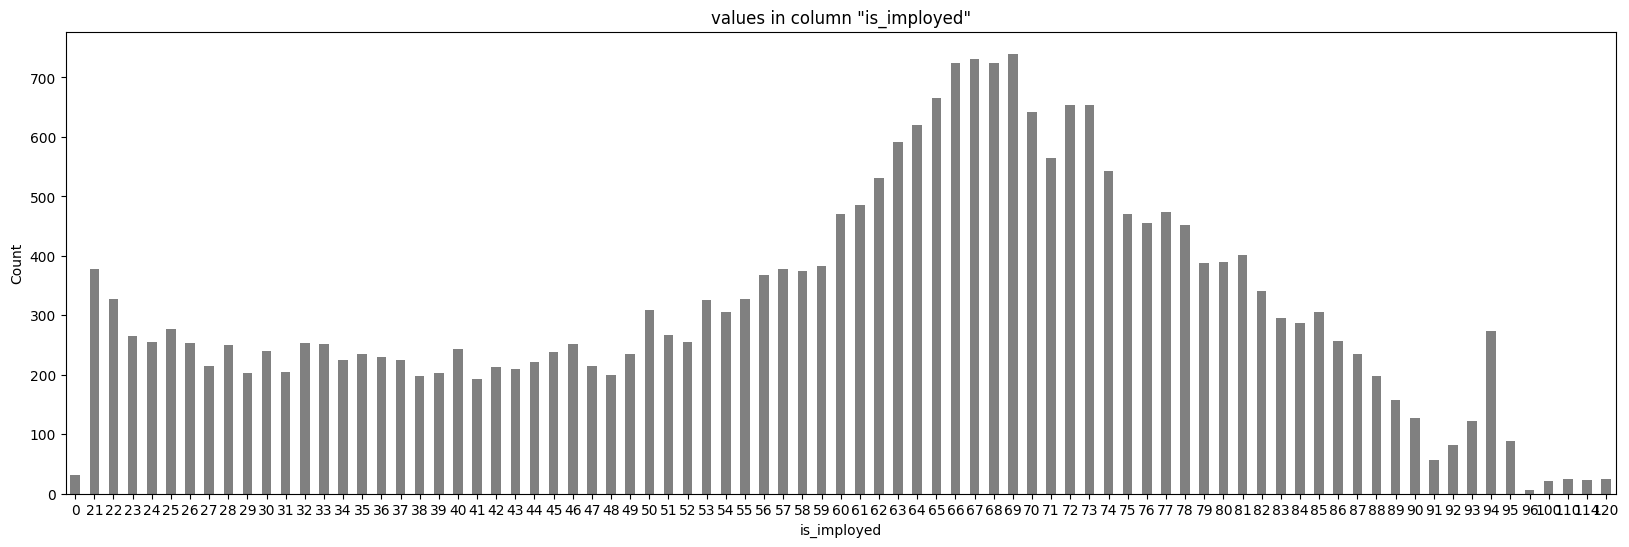

In [21]:
df_aux = df[df['is_employed'].isnull()]

age_in_is_imployed_missing_values_counts = df_aux['age'].value_counts()
age_in_is_imployed_missing_values_counts = age_in_is_imployed_missing_values_counts.sort_index()
plt.figure(figsize=(20, 6)) 
age_in_is_imployed_missing_values_counts.plot(kind='bar',color=['gray'])
plt.title('values in column "is_imployed"')
plt.xlabel('is_imployed')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

we can see that the null values ​​extend across all ages

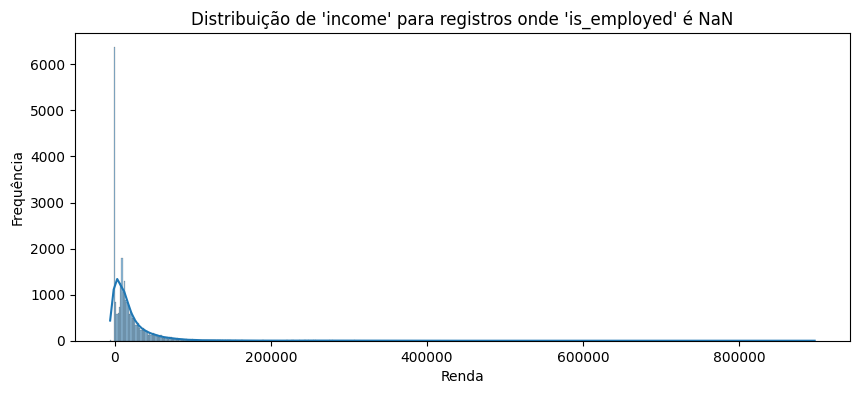

In [22]:
plt.figure(figsize=(10, 4))
sns.histplot(df_aux['income'].dropna(), kde=True)
plt.title("Distribuição de 'income' para registros onde 'is_employed' é NaN") 
plt.xlabel("Renda")
plt.ylabel("Frequência")
plt.show()

Some of them have income 

## Income

In [32]:
df['income'].describe()

count    7.245800e+04
mean     4.188143e+04
std      5.827460e+04
min     -6.900000e+03
25%      1.070000e+04
50%      2.640000e+04
75%      5.200000e+04
max      1.257000e+06
Name: income, dtype: float64

In [33]:
df[df['income'] < 0]

,Unnamed: 0,custid,sex,is_employed,income,marital_status,health_ins,housing_type,num_vehicles,age,state_of_res,code_column,gas_usage,rooms,recent_move_b
379,542,000582425_02,Male,True,-1500.0,Married,True,Homeowner free and clear,5.0,61,Alabama,1047,50.0,3,F
557,780,000841705_03,Female,True,-6800.0,Married,True,Homeowner free and clear,2.0,60,Alabama,1047,3.0,5,F
1281,1808,000078804_02,Male,True,-4500.0,Married,True,Homeowner with mortgage/loan,2.0,36,Arizona,1534,40.0,3,F
2968,4199,000616218_01,Male,True,-6900.0,Married,True,Rented,2.0,120,Arkansas,653,60.0,2,F
8089,11343,000819312_01,Male,True,-5800.0,Married,False,Homeowner free and clear,6.0,22,California,8962,60.0,4,F
8275,11597,000853222_02,Female,NaN,-2800.0,Married,True,Homeowner with mortgage/loan,4.0,47,California,8962,100.0,4,F
10035,14014,001148677_01,Female,False,-5400.0,Never married,True,Homeowner with mortgage/loan,2.0,59,California,8962,40.0,3,F
10503,14672,001229905_01,Female,NaN,-5400.0,Married,True,Homeowner with mortgage/loan,4.0,58,California,8962,50.0,5,F
11974,16695,001477531_01,Female,False,-5300.0,Divorced/Separated,True,Homeowner with mortgage/loan,2.0,44,California,8962,20.0,3,F
13326,18535,001320566_01,Male,True,-2700.0,Divorced/Separated,True,Rented,2.0,44,Colorado,1291,3.0,1,F


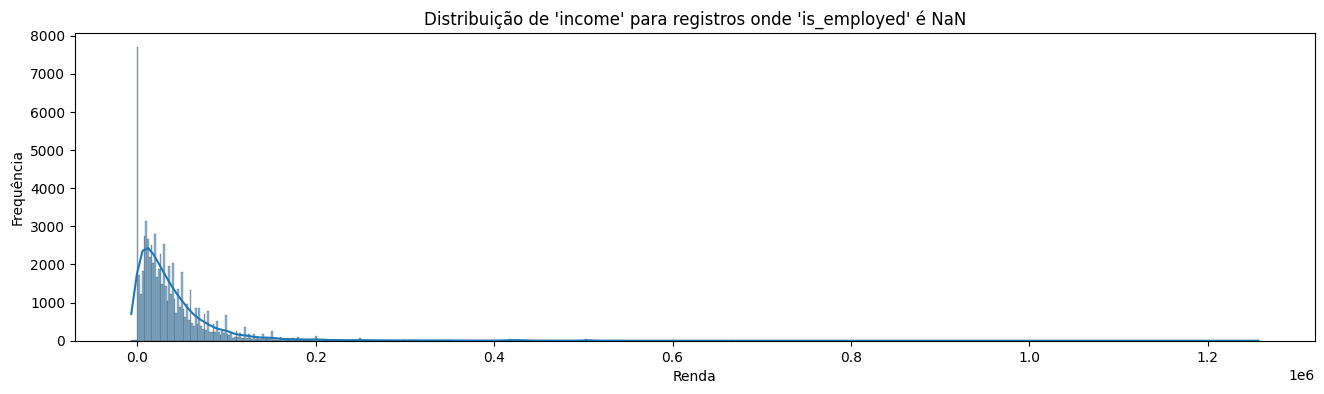

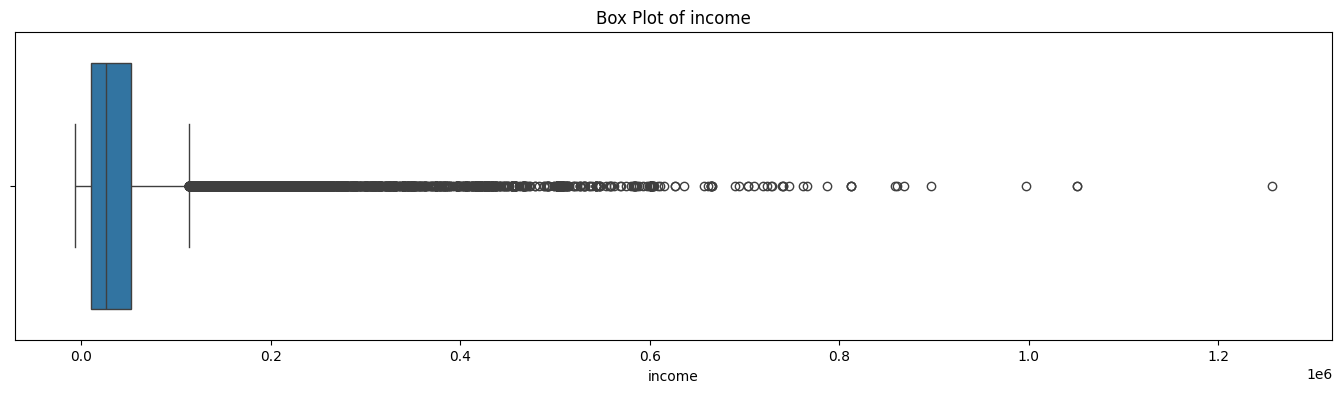

In [23]:
plt.figure(figsize=(16, 4))
sns.histplot(df['income'], kde=True)
plt.title("Distribuição de 'income' para registros onde 'is_employed' é NaN") 
plt.xlabel("Renda")
plt.ylabel("Frequência")
plt.show()

plt.figure(figsize=(17, 4))
sns.boxplot(x=df['income'])
plt.title(f'Box Plot of income')
plt.show()

Income have a lot of outliers and his distribution is not a normal distribution 

## Marital_status

marital_status
Married               38040
Never married         19120
Divorced/Separated    10572
Widowed                4726
Missing values            0
Name: count, dtype: int64


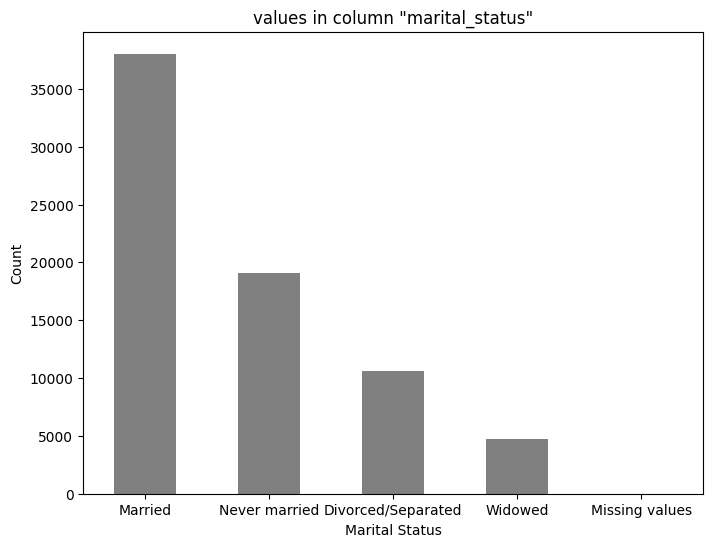

In [24]:
martital_status_counts = df['marital_status'].value_counts()
martital_status_counts['Missing values'] = df['marital_status'].isnull().sum()
print(martital_status_counts)
plt.figure(figsize=(8, 6)) 
martital_status_counts.plot(kind='bar',color=['gray'])
plt.title('values in column "marital_status"')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Marital_status, has no missing values and almost half of the dataset is married

## Health_ins

health_ins
True              65553
False              6905
Missing values        0
Name: count, dtype: int64


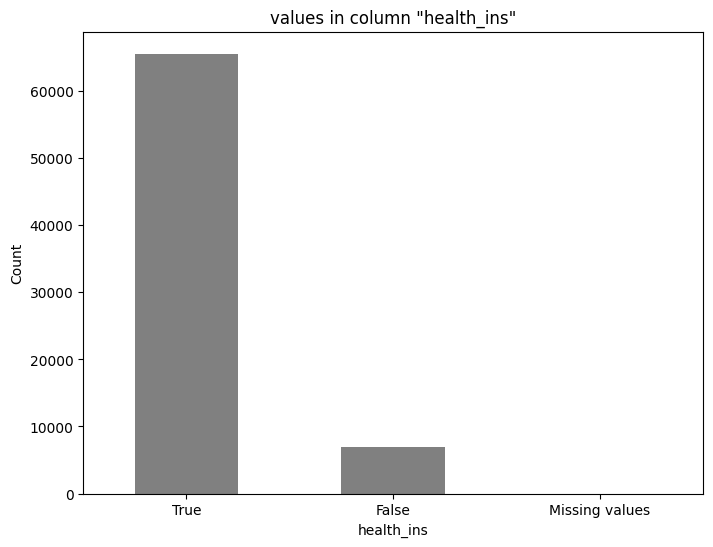

In [25]:
health_ins_counts = df['health_ins'].value_counts()
health_ins_counts['Missing values'] = df['health_ins'].isnull().sum()
print(health_ins_counts)
plt.figure(figsize=(8, 6)) 
health_ins_counts.plot(kind='bar',color=['gray'])
plt.title('values in column "health_ins"')
plt.xlabel('health_ins')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Health_ins, has no missing values and is extremely unbalanced

## Housing_type

housing_type
Homeowner with mortgage/loan    31092
Rented                          21956
Homeowner free and clear        16604
Occupied with no rent            1120
Missing values                   1686
Name: count, dtype: int64


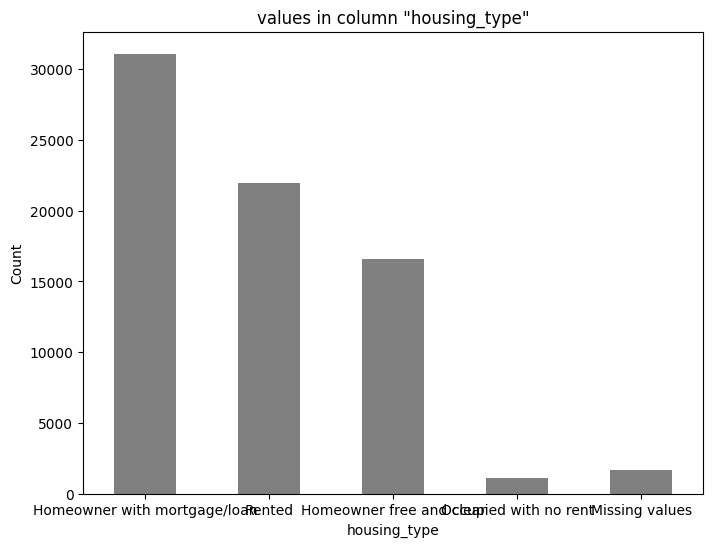

In [26]:
housing_type_counts = df['housing_type'].value_counts()
housing_type_counts['Missing values'] = df['housing_type'].isnull().sum()
print(housing_type_counts)
plt.figure(figsize=(8, 6)) 
housing_type_counts.plot(kind='bar',color=['gray'])
plt.title('values in column "housing_type"')
plt.xlabel('housing_type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Housing_type, has 1686 missing values

## Num_vehicles

num_vehicles
2.0               28052
1.0               17445
3.0               13094
4.0                5100
0.0                4636
5.0                1628
6.0                 817
Missing values     1686
Name: count, dtype: int64


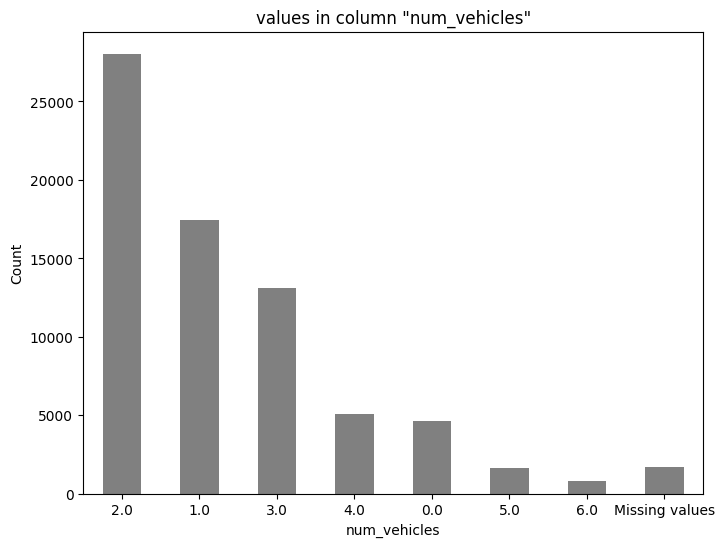

In [27]:
num_vehicles_counts = df['num_vehicles'].value_counts()
num_vehicles_counts['Missing values'] = df['num_vehicles'].isnull().sum()
print(num_vehicles_counts)
plt.figure(figsize=(8, 6)) 
num_vehicles_counts.plot(kind='bar',color=['gray'])
plt.title('values in column "num_vehicles"')
plt.xlabel('num_vehicles')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

num_vehicles, has 1686 missing values

## Age

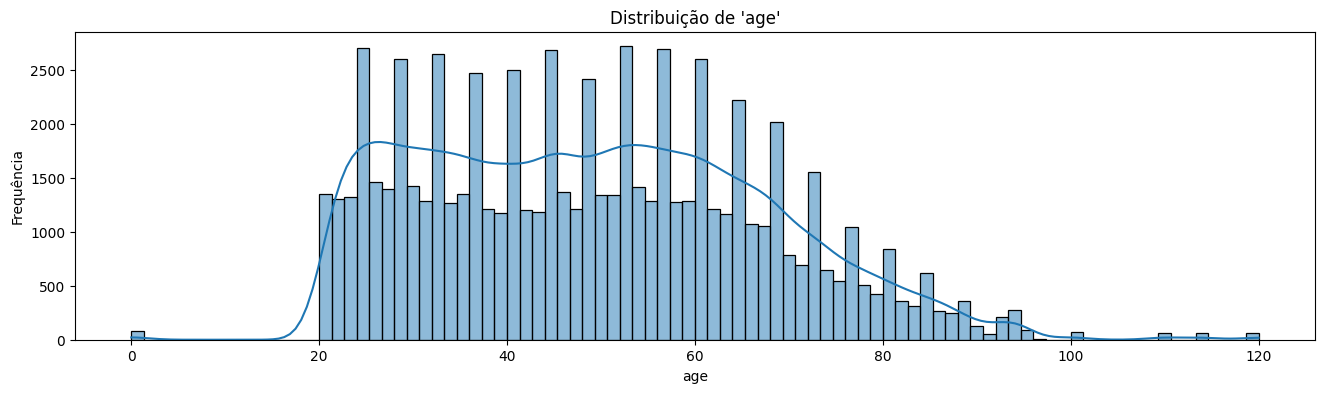

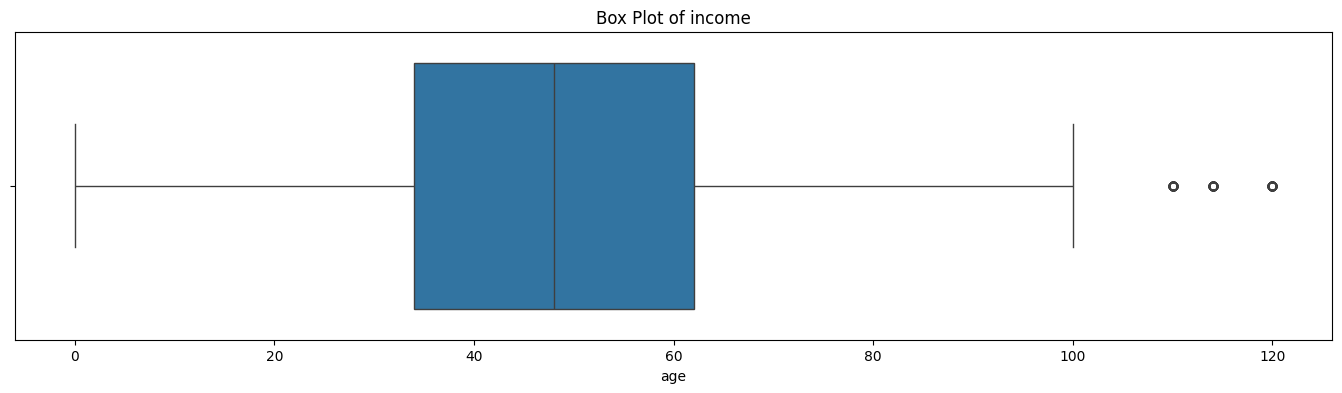

In [28]:
plt.figure(figsize=(16, 4))
sns.histplot(df['age'], kde=True)
plt.title("Distribuição de 'age'") 
plt.xlabel("age")
plt.ylabel("Frequência")
plt.show()

plt.figure(figsize=(17, 4))
sns.boxplot(x=df['age'])
plt.title(f'Box Plot of income')
plt.show()

Age has some atypical factors, not as serious as income.

## Gas_usage

Number of NaN in gas_usage : 1686


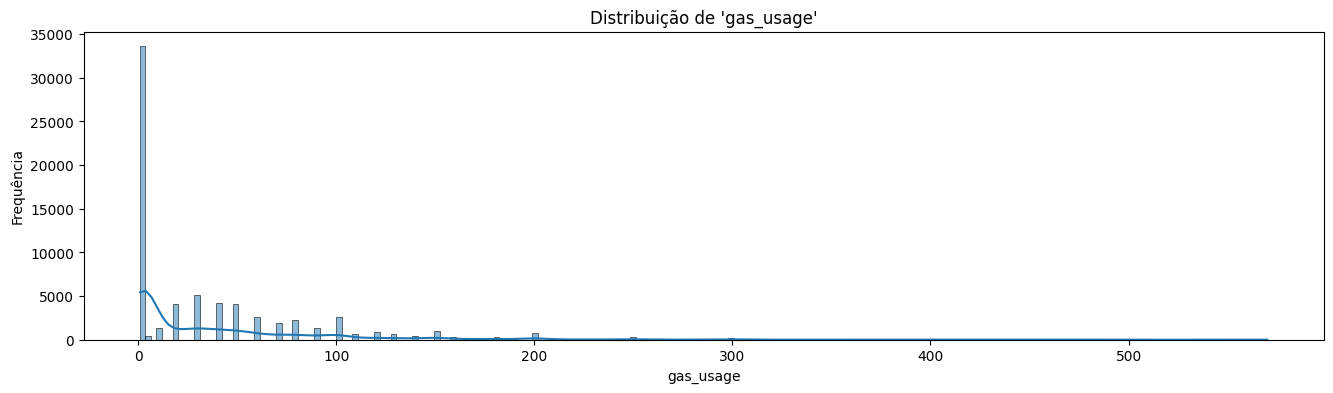

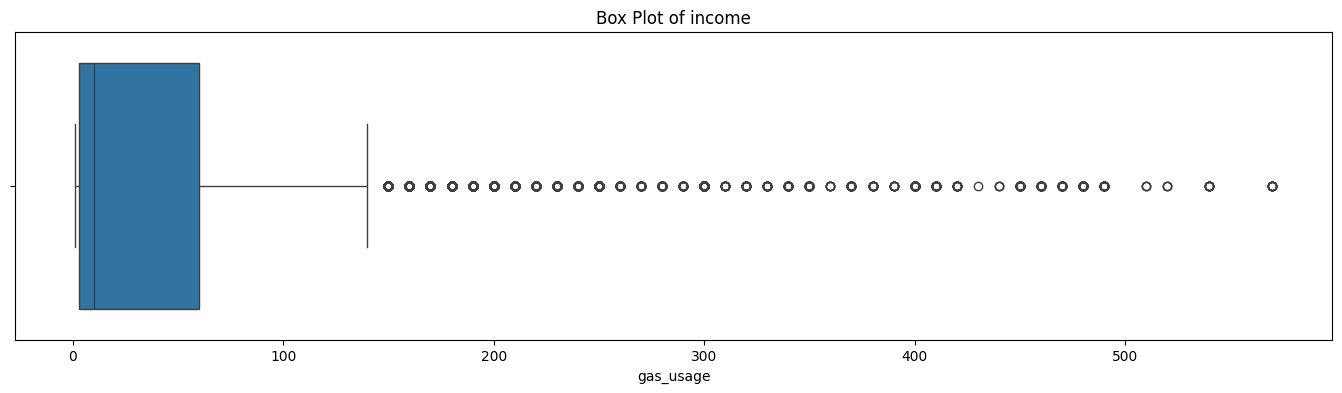

In [29]:
print(f"Number of NaN in gas_usage : {df['gas_usage'].isnull().sum()}")

plt.figure(figsize=(16, 4))
sns.histplot(df['gas_usage'], kde=True)
plt.title("Distribuição de 'gas_usage'") 
plt.xlabel("gas_usage")
plt.ylabel("Frequência")
plt.show()

plt.figure(figsize=(17, 4))
sns.boxplot(x=df['gas_usage'])
plt.title(f'Box Plot of income')
plt.show()

Gas usage also have outliers and have 1686 missing values too

## Rooms

rooms
2                 12230
3                 12134
5                 12098
1                 12042
6                 11999
4                 11955
Missing values        0
Name: count, dtype: int64


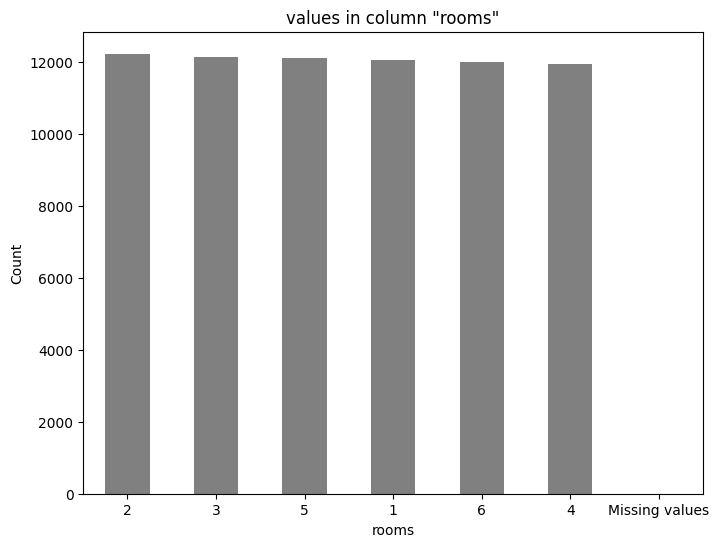

In [30]:
rooms_counts = df['rooms'].value_counts()
rooms_counts['Missing values'] = df['rooms'].isnull().sum()
print(rooms_counts)
plt.figure(figsize=(8, 6)) 
rooms_counts.plot(kind='bar',color=['gray'])
plt.title('values in column "rooms"')
plt.xlabel('rooms')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Rooms, have a ballanced distribution without any missing value

## Recent_move_b

recent_move_b
F                 61773
T                  8998
Missing values     1687
Name: count, dtype: int64


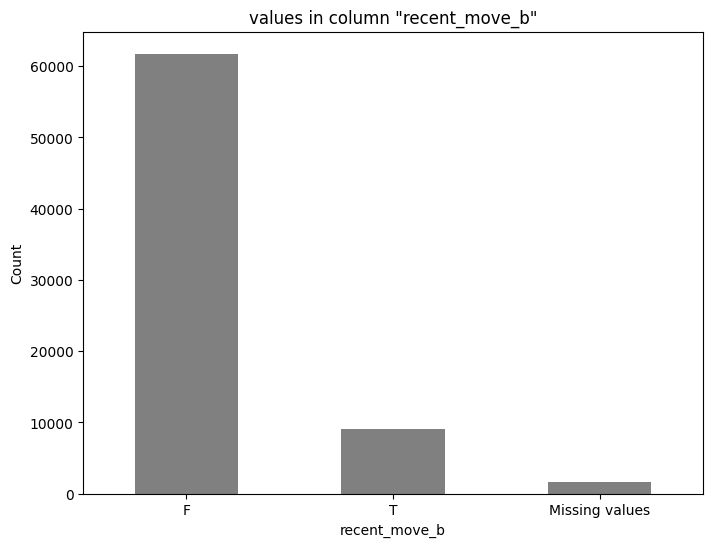

In [31]:
recent_move_b_counts = df['recent_move_b'].value_counts()
recent_move_b_counts['Missing values'] = df['recent_move_b'].isnull().sum()
print(recent_move_b_counts)
plt.figure(figsize=(8, 6)) 
recent_move_b_counts.plot(kind='bar',color=['gray'])
plt.title('values in column "recent_move_b"')
plt.xlabel('recent_move_b')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

recent_move_b have 1687 missing values and its unballanced